### Importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
diabetes_data = pd.read_csv('dataset/PimaIndians_processed.csv')

diabetes_data.head(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1
5,0.529718,1.407219,0.107109,-0.965953,0.159608,-1.038117,0.185349,1.976412,1
6,-1.029213,-0.150141,1.068636,1.699951,0.623000,1.811417,0.081015,0.013271,1
7,-0.717427,-0.636816,-3.258237,0.843053,-0.615520,1.455225,-0.985506,0.209585,0
8,-0.717427,-0.247476,-0.053146,0.081366,-0.505991,0.215678,0.017256,0.111428,1
9,-0.093854,0.109419,1.389146,1.128686,0.665127,0.885318,0.524433,-0.379357,0


In [4]:
FEATURES = list(diabetes_data.columns[:-1])

FEATURES

['pregnant',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'diabetes',
 'age']

### Apply PCA (Principal component analysis)
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [5]:
from sklearn.decomposition import PCA

def apply_pca(n):
    
    pca = PCA(n_components = n) 
    x_new = pca.fit_transform(diabetes_data[FEATURES])
        
    return pca, pd.DataFrame(x_new)

In [8]:
pca_obj, _ = apply_pca(8)

In [9]:
print("Explained Variance:", pca_obj.explained_variance_ratio_)

Explained Variance: [0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765
 0.03888422 0.03707119]


In [11]:
sum(pca_obj.explained_variance_ratio_)

np.float64(1.0)

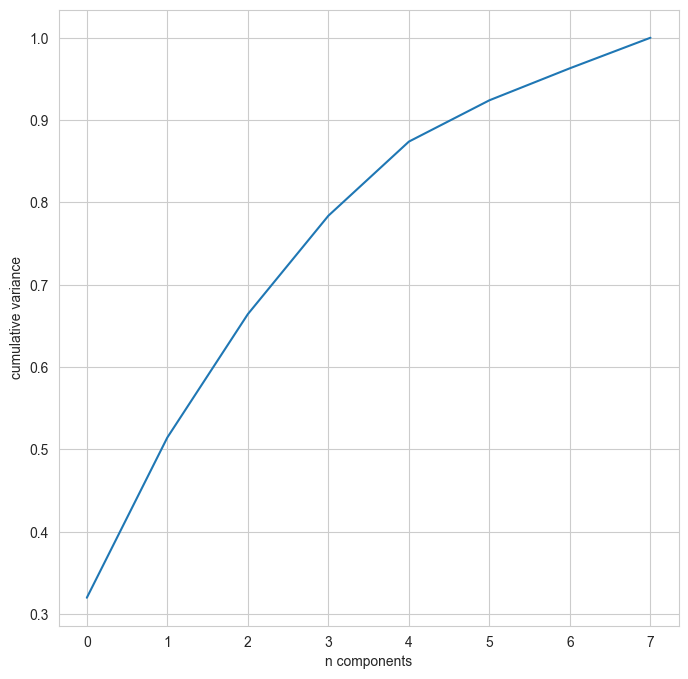

In [10]:
plt.figure(figsize = (8, 8))

plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [13]:
Y = diabetes_data['test']

In [14]:
_ , X_new = apply_pca(4)

In [15]:
X_new.sample(10)

,0,1,2,3
158,-1.925915,1.782488,-0.227296,-0.567663
163,-0.153886,-0.803087,0.334855,0.443864
370,-0.332011,-1.409410,-0.054088,-0.747552
56,-0.744373,-0.580827,-0.571340,-0.334198
380,-1.917783,0.249414,0.545973,0.477738
66,-1.944902,-0.544285,0.178123,0.286212
265,1.077308,3.596028,0.978230,-0.256659
73,2.127168,-2.012108,1.449328,-0.992850
175,-2.434325,0.342407,0.202565,0.469868
193,-1.981528,0.233149,1.726294,0.909213


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [21]:
y_pred = model.predict(x_test)

In [24]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.head(10)

,y_test,y_pred
311,0,0
260,0,0
350,0,0
248,1,0
49,1,0
304,0,0
231,0,0
257,0,0
327,0,0
114,0,0


In [25]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

diabetes_crosstab

y_test,0,1
y_pred,,
0,50,10
1,7,12


In [27]:
TP = diabetes_crosstab[1][1]
TN = diabetes_crosstab[0][0]
FP = diabetes_crosstab[0][1]
FN = diabetes_crosstab[1][0]

print("True Positives: ", TP)
print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)


True Positives:  12
True Negatives:  50
False Positives:  7
False Negatives:  10


In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [29]:
accuracy_score(y_test, y_pred)

0.7848101265822784

In [32]:
precision_score(y_test, y_pred)

0.631578947368421

In [33]:
recall_score(y_test, y_pred)

0.5454545454545454